# WMTS

pyeodh uses OWSLib for it's WMTS component (see [OWSLib documentation](https://owslib.readthedocs.io/en/latest/)). `pyeodh.resource_catalog.Catalog.get_wmts()` method returns an initialized OWSLib `WebMapTileService` object, which you can use to further interact with the API.

If you're not familiar with how WMTS works, see this [OGC training material](https://opengeospatial.github.io/e-learning/wmts/text/index.html). In short, the main entrypoint to using the service is understanding it's capabilities and getting to know it's metadata ([GetCapabilites operation](https://opengeospatial.github.io/e-learning/wmts/text/main.html)). The next step is using the metadata to fetch tiles using the GetTile operation.

Initialize `pyeodh` and the WMTS:


In [1]:
import pyeodh
import folium

client = pyeodh.Client()
catalog = client.get_catalog_service().get_catalog("public/catalogs/stac-fastapi")
wmts = catalog.get_wmts()

HTTPError: 500 Server Error: Internal Server Error for url: https://staging.eodatahub.org.uk/api/catalogue/stac/catalogs/public/catalogs/stac-fastapi/wmts?service=WMTS&request=GetCapabilities&version=1.0.0

Retrieve metadata about the service


In [2]:
print(
    wmts.identification.title
)  # not all attributes have to be populated in the API, in this case the service title is not set.
print(wmts.identification.type)
print(wmts.identification.version)

Web Map Tile Service
OGC WMTS
1.0.0


Retrieve content metadata for available layers


In [3]:
print("Layers: ", list(wmts.contents.keys()))

for layer in wmts.contents.values():
    print(layer.id, layer.title, layer.formats, layer.dimensions)

Layers:  ['sentinel2_ard_rgb']
sentinel2_ard_rgb sentinel2_ard_rgb ['image/png'] {'TIME': {'values': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2

Retrieve metadata on TileMatrixSets and individual matrices


In [4]:
print("TileMatrixSets: ", list(wmts.tilematrixsets.keys()))
tms = list(wmts.tilematrixsets.values())[0]
print(f"{tms.identifier} matrices:")
for tm in tms.tilematrix.values():
    print(tm.identifier, tm.matrixwidth, tm.matrixheight)

TileMatrixSets:  ['CDB1GlobalGrid', 'CanadianNAD83_LCC', 'EuropeanETRS89_LAEAQuad', 'GNOSISGlobalGrid', 'LINZAntarticaMapTilegrid', 'NZTM2000Quad', 'UPSAntarcticWGS84Quad', 'UPSArcticWGS84Quad', 'UTM31WGS84Quad', 'WGS1984Quad', 'WebMercatorQuad', 'WorldCRS84Quad', 'WorldMercatorWGS84Quad']
CDB1GlobalGrid matrices:
-10 360 180
-9 360 180
-8 360 180
-7 360 180
-6 360 180
-5 360 180
-4 360 180
-3 360 180
-2 360 180
-1 360 180
0 360 180
1 720 360
2 1440 720
3 2880 1440
4 5760 2880
5 11520 5760
6 23040 11520
7 46080 23040
8 92160 46080
9 184320 92160
10 368640 184320
11 737280 368640
12 1474560 737280
13 2949120 1474560
14 5898240 2949120
15 11796480 5898240
16 23592960 11796480
17 47185920 23592960
18 94371840 47185920
19 188743680 94371840
20 377487360 188743680
21 754974720 377487360


Based on this metadata you can fetch and view a specific tile


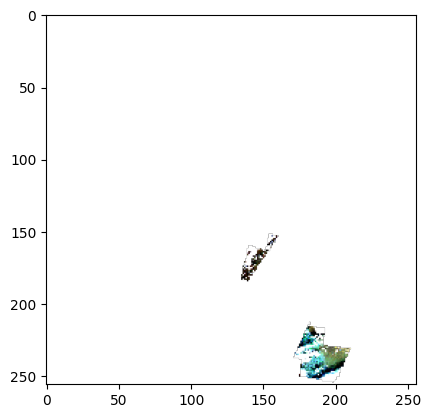

In [16]:
from PIL import Image
import io
import matplotlib.pyplot as plt

tile = wmts.gettile(
    layer="sentinel2_ard_rgb",
    style="default",
    tilematrixset="EuropeanETRS89_LAEAQuad",
    tilematrix="1",
    row=0,
    column=0,
    format="image/png",
    time="2023-01-01",
)

image = Image.open(io.BytesIO(tile.read()))

plt.imshow(image)

Or view a layer in Folium map.


In [33]:
m = folium.Map(location=[55, 0], zoom_start=5)

folium.WmsTileLayer(
    url=catalog.wmts_href,
    layers="sentinel2_ard_rgb",
    name="test",
    overlay=True,
    control=True,
    fmt="image/png",
    styles="default",
    tilematrixset="EuropeanETRS89_LAEAQuad",
    TileMatrix=1,
    time="2023-01-01",
    version="1.0.0",
).add_to(m)

folium.LayerControl().add_to(m)
m